In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv(r'C:\Users\lavin\Documents\DataSciencePractiseProblems\Indeed Assignment\PS_Homework_data_set.csv')

In [3]:
# general stats in data

In [4]:
Data.describe() 
# Age and Assign_Days have negative values -  wrong data

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,77891.000000,7.789100e+04,77891.000000,77891.000000,77891.000000,3.340000e+03
mean,38945.000000,7.924271e+06,0.476037,309.958532,120.482546,4.865177e+07
std,22485.339246,3.918985e+06,0.499429,488.801166,39.527908,1.736891e+08
min,0.000000,4.850000e+02,0.000000,-27.000000,-2.000000,1.200000e+04
25%,19472.500000,4.317428e+06,0.000000,0.000000,136.000000,6.398444e+06
50%,38945.000000,1.078788e+07,0.000000,0.000000,137.000000,1.514775e+07
75%,58417.500000,1.080747e+07,1.000000,523.000000,138.000000,3.704959e+07
max,77890.000000,1.119963e+07,1.000000,3855.000000,138.000000,6.533791e+09


In [5]:
# check if the data that has negative age has revenue, if yes, we cannot delete it, as it will affect the revenue impact calculations

In [6]:
np.mean(Data[Data['age'] <0]['revenue'])
# Data is important, no deletion

41730232.294117644

In [7]:
# check if the data that has negative assign_days has revenue, if yes, we cannot delete it, as it will affect the revenue impact calculations

In [8]:
np.mean(Data[Data['assign_days'] <0]['revenue'])
# Data is not important, as all nulls, can be deleted / ignored, Lets ignore

nan

In [9]:
Data.describe()

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,77891.000000,7.789100e+04,77891.000000,77891.000000,77891.000000,3.340000e+03
mean,38945.000000,7.924271e+06,0.476037,309.958532,120.482546,4.865177e+07
std,22485.339246,3.918985e+06,0.499429,488.801166,39.527908,1.736891e+08
min,0.000000,4.850000e+02,0.000000,-27.000000,-2.000000,1.200000e+04
25%,19472.500000,4.317428e+06,0.000000,0.000000,136.000000,6.398444e+06
50%,38945.000000,1.078788e+07,0.000000,0.000000,137.000000,1.514775e+07
75%,58417.500000,1.080747e+07,1.000000,523.000000,138.000000,3.704959e+07
max,77890.000000,1.119963e+07,1.000000,3855.000000,138.000000,6.533791e+09


In [10]:
Data.info()
# Inference : 
# All the date columns are 100% populated. 
# there are 8433 rows with first_revenue_date populated, but only 3340 rows with revenue in it.  
# As it will be worthless to do mean imputation on target variable (revenue)'s column, so we will try using only the rows with nonzero revenue for our analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77891 entries, 0 to 77890
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              77891 non-null  int64  
 1   advertiser_id           77891 non-null  int64  
 2   assigned                77891 non-null  int64  
 3   date_assignment_starts  77891 non-null  object 
 4   date_assignment_ends    77891 non-null  object 
 5   first_revenue_date      8433 non-null   object 
 6   date_created            77891 non-null  object 
 7   age                     77891 non-null  int64  
 8   assign_days             77891 non-null  int64  
 9   revenue                 3340 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 5.9+ MB


In [11]:
Data.head(4) # 77891 rows × 10 columns
#

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN


Columns explained :

- advertiser_id column is of no use
- Assigned column suggests that whether a sales rep was assigned or not assigned to the lead
- for assigned = 1 , date_assignment_starts, date_assignment_ends are the dates of assignment of sales rep to the lead
- for assigned = 0, it is unclear why there is still assignment start and assignment end date
- first_revenue_date is the date on which lead was converted to customer. This has data even for some rows dont have revenue filled.
- date_created is the date the lead was created in system
- Age is total age of the lead till the time it got assigned to sales team
- Assign_days is the number of days sales is assigned to the lead.
- revenue is the total revenue by customer so far

In [12]:
# Missing values analysis
Data.isna().sum()

Unnamed: 0                    0
advertiser_id                 0
assigned                      0
date_assignment_starts        0
date_assignment_ends          0
first_revenue_date        69458
date_created                  0
age                           0
assign_days                   0
revenue                   74551
dtype: int64

In [13]:
77891-74551
# 3340 leads have revenue generated. 

3340

In [14]:
3340/77891 # 4.2 % of the leads got converted to customers

0.04288043548035075

##### Question 1 : Assigned and Unassigned population description

In [15]:
Data.groupby(['assigned']).count()

,Unnamed: 0,advertiser_id,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
assigned,,,,,,,,,
0,40812,40812,40812,40812,2850,40812,40812,40812,1775
1,37079,37079,37079,37079,5583,37079,37079,37079,1565


In [16]:
# DF_Assigned and DF_Unassigned to be used for ML model only

In [17]:
DF_Assigned = Data[Data['assigned'] == 1]
DF_Unassigned = Data[Data['assigned'] == 0]

In [18]:
DF_Assigned.head()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN


In [19]:
DF_Assigned.describe()
# 37079 leads assigned to sales
# Mean revenue  : 7.673686e+07

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,37079.000000,3.707900e+04,37079.0,37079.000000,37079.000000,1.565000e+03
mean,21021.998031,4.887142e+06,1.0,638.015966,116.594487,7.673686e+07
std,15582.937167,3.707155e+06,0.0,533.988314,42.409737,1.863678e+08
min,0.000000,4.850000e+02,1.0,-27.000000,-2.000000,1.200000e+04
25%,9409.500000,1.492976e+06,1.0,190.000000,136.000000,8.060268e+06
50%,18882.000000,4.115693e+06,1.0,544.000000,138.000000,2.318009e+07
75%,28417.500000,8.194299e+06,1.0,995.000000,138.000000,5.854837e+07
max,77890.000000,1.119963e+07,1.0,3855.000000,138.000000,2.500000e+09


In [20]:
DF_Unassigned.describe()
# 40812 leads not assigned to sales, Mean revenue = 2.388942e+07

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,40812.000000,4.081200e+04,40812.0,40812.000000,40812.000000,1.775000e+03
mean,55228.617318,1.068360e+07,0.0,11.907919,124.014971,2.388942e+07
std,13686.097612,9.120191e+05,0.0,101.619484,36.355873,1.576417e+08
min,33.000000,6.992000e+03,0.0,0.000000,0.000000,1.300000e+04
25%,44296.750000,1.079328e+07,0.0,0.000000,136.000000,5.653500e+06
50%,55528.500000,1.080457e+07,0.0,0.000000,137.000000,1.235334e+07
75%,66938.250000,1.081605e+07,0.0,0.000000,137.000000,2.467204e+07
max,77824.000000,1.082697e+07,0.0,3097.000000,138.000000,6.533791e+09


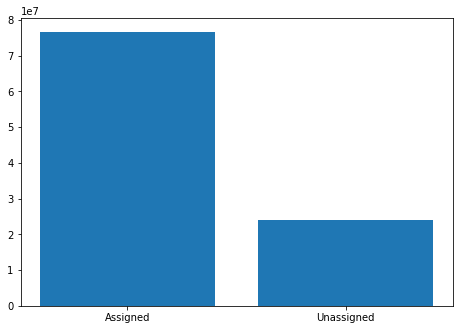

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
AssignmentStatus = ['Assigned' , 'Unassigned']
revenue = [Data[Data['assigned'] == 1]['revenue'].mean() ,Data[Data['assigned'] == 0]['revenue'].mean()]
ax.bar(AssignmentStatus,revenue)
plt.show()


# More revenue from Assigned group 

In [22]:
# Lets take the best data (data with no missing values) and answer all analysis questions, as we can best judge the relationship between the variables using best data
# AssignedGroupCompleteData - Assigned Group , Revenue non zero , And Revenue happened after the Lead was assigned to sales 
AssignedGroupCompleteDataDF = Data[ (Data['assigned'] ==1) & (Data['revenue'] >0) &  (Data['date_assignment_starts'] <= Data['first_revenue_date'])]

In [23]:
AssignedGroupCompleteDataDF.describe() ## 301 rows , Mean revenue : 5.159977e+07

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,301.000000,3.010000e+02,301.0,301.000000,301.000000,3.010000e+02
mean,45288.857143,9.659103e+06,1.0,101.448505,98.863787,5.159977e+07
std,18472.463094,2.515569e+06,0.0,242.773135,52.620446,1.157795e+08
min,3656.000000,4.295490e+05,1.0,-22.000000,0.000000,1.247200e+05
25%,33670.000000,1.061682e+07,1.0,0.000000,57.000000,7.336935e+06
50%,41774.000000,1.079073e+07,1.0,0.000000,136.000000,2.167627e+07
75%,59992.000000,1.080905e+07,1.0,13.000000,138.000000,5.000000e+07
max,77886.000000,1.114089e+07,1.0,1461.000000,138.000000,1.618767e+09


In [24]:
UnassignedCompleteDataDF = Data[ (Data['assigned'] ==0) & (Data['revenue'] >0) &  (Data['date_assignment_starts'] <= Data['first_revenue_date'])]

In [25]:
UnassignedCompleteDataDF.describe() ## 792 rows , 1.759331e+07 Mean revenue

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,792.000000,7.920000e+02,792.0,792.000000,792.000000,7.920000e+02
mean,55474.489899,1.074993e+07,0.0,5.736111,79.614899,1.759331e+07
std,12925.318374,6.598632e+05,0.0,73.497455,63.082607,3.040057e+07
min,5566.000000,7.478460e+05,0.0,0.000000,0.000000,1.300000e+04
25%,44935.250000,1.079392e+07,0.0,0.000000,4.000000,4.694012e+06
50%,53787.500000,1.080283e+07,0.0,0.000000,136.000000,1.083337e+07
75%,66917.000000,1.081603e+07,0.0,0.000000,137.000000,2.140200e+07
max,77824.000000,1.082697e+07,0.0,1290.000000,138.000000,5.883000e+08


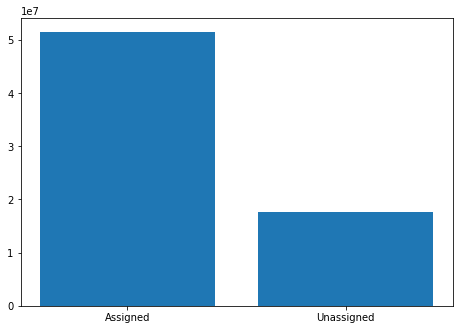

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
AssignmentStatus = ['Assigned' , 'Unassigned']
revenue = AssignedGroupCompleteDataDF['revenue'].mean() , UnassignedCompleteDataDF['revenue'].mean()
ax.bar(AssignmentStatus,revenue)
plt.show()


# More revenue from Assigned group in the complete data rows as well

##### Question 2  Metric 1 : Mean Revenue

In [27]:
AssignedGroupCompleteDataDF.describe() # 301 rows ONLY
# Mean revenue from Assigned Group , Revenue non zero , And Revenue happened after the Lead was assigned to sales
# 5.159977e+07

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,301.000000,3.010000e+02,301.0,301.000000,301.000000,3.010000e+02
mean,45288.857143,9.659103e+06,1.0,101.448505,98.863787,5.159977e+07
std,18472.463094,2.515569e+06,0.0,242.773135,52.620446,1.157795e+08
min,3656.000000,4.295490e+05,1.0,-22.000000,0.000000,1.247200e+05
25%,33670.000000,1.061682e+07,1.0,0.000000,57.000000,7.336935e+06
50%,41774.000000,1.079073e+07,1.0,0.000000,136.000000,2.167627e+07
75%,59992.000000,1.080905e+07,1.0,13.000000,138.000000,5.000000e+07
max,77886.000000,1.114089e+07,1.0,1461.000000,138.000000,1.618767e+09


Most important metric:  Mean Revenue 

Increase in average revenue of Assigned Leads, as compared to unassigned leads.  

Assigned Leads count - 37079, Mean Revenue from customers who made purchase after sales team assigned. = 51599770 

Unassigned Leads count - 40812, Mean Revenue = 23889420 

Increment in Average revenue due to lead assignment = 51599770 – 23889420 = 27710350 

So, on an average, the leads spent 27710350 more after sales was assigned. 

In [28]:
Data_clean = Data

##### Question 2 Metric 2 : CONVERSION DAYS

In [29]:
Data_clean['ConversionDays'] = np.where( Data_clean['first_revenue_date'].isna(), -1 , pd.to_datetime(Data_clean['first_revenue_date']) - pd.to_datetime(Data_clean['date_assignment_starts']) )

In [30]:
Data_clean['ConversionDays'] = Data_clean['ConversionDays'].dt.days

In [31]:
# removing all negatove values from conversion days
Data_clean['ConversionDays'] = np.where(Data_clean['ConversionDays']>0 , Data_clean['ConversionDays'] , 0 )

In [32]:
Data_clean['ConversionDays'].describe()

count    77891.000000
mean         1.027115
std          8.864400
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        136.000000
Name: ConversionDays, dtype: float64

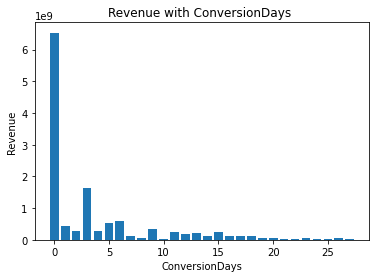

In [33]:
# Relationship of Revenue with ConversionDays, where conversiondays is positive
import matplotlib.pyplot as plt

plt.bar(Data_clean['ConversionDays'],Data_clean['revenue'])
plt.title('Revenue with ConversionDays ')
plt.xlabel('ConversionDays')
plt.ylabel('Revenue')
plt.show()
# Inference : Revenue is more when conversiondays is less, basically probability of lead getting converted to customer is more in the start of the sales assignment period

In [35]:

# Mean Conversion days required in entire data = 33 days 
np.mean(Data_clean[(Data_clean['first_revenue_date'].notna()) & (Data_clean['ConversionDays'] >0)])

Unnamed: 0        4.806066e+04
advertiser_id     9.680219e+06
assigned          3.734940e-01
age               1.095081e+02
assign_days       9.607727e+01
revenue           2.695831e+07
ConversionDays    3.323764e+01
dtype: float64

In [36]:
# Mean Conversion days required in Unassigned Group = 27 days (considering all rows)
np.mean(Data_clean[(Data_clean['first_revenue_date'].notna()) &(Data_clean['assigned']==0) & (Data_clean['ConversionDays'] >0)])

Unnamed: 0        5.549539e+04
advertiser_id     1.071759e+07
assigned          0.000000e+00
age               8.348806e+00
assign_days       8.933820e+01
revenue           1.759331e+07
ConversionDays    2.704377e+01
dtype: float64

In [37]:
# Mean Conversion days required in Unassigned Group = 5  days (considering only the rows with revenue)
np.mean(Data_clean[(Data_clean['first_revenue_date'].notna()) &(Data_clean['assigned']==0) & (Data_clean['ConversionDays'] >0) & (Data_clean['revenue']>0)])

Unnamed: 0        5.547449e+04
advertiser_id     1.074993e+07
assigned          0.000000e+00
age               5.736111e+00
assign_days       7.961490e+01
revenue           1.759331e+07
ConversionDays    5.526515e+00
dtype: float64

In [38]:
# Mean Conversion days required in Assigned Group = 43 days (Considering all rows) 
np.mean(Data_clean[(Data_clean['first_revenue_date'].notna()) &(Data_clean['assigned']==1) & (Data_clean['ConversionDays'] >0)])

Unnamed: 0        3.558951e+04
advertiser_id     7.940119e+06
assigned          1.000000e+00
age               2.791947e+02
assign_days       1.073815e+02
revenue           5.159977e+07
ConversionDays    4.362736e+01
dtype: float64

In [40]:
# Mean Conversion days required in Assigned Group = 8 days (Considering only the rows having revenue) 
np.mean(Data_clean[(Data_clean['first_revenue_date'].notna()) &(Data_clean['assigned']==1) & (Data_clean['ConversionDays'] >0) & (Data_clean['revenue']>0)])

Unnamed: 0        4.528886e+04
advertiser_id     9.659103e+06
assigned          1.000000e+00
age               1.014485e+02
assign_days       9.886379e+01
revenue           5.159977e+07
ConversionDays    8.757475e+00
dtype: float64

##### Question 2 : Metric : Number of customers

In [41]:
RevenueGeneratingCustomers = Data[Data['revenue']>0]
RevenueGeneratingCustomers.describe()
# Mean revenue from 3340 revenue generating cutomers is 48651770
RevenueGeneratingCustomers.info()    # -- no null values in these. 
RevenueGeneratingCustomers.groupby('assigned').count() ### 1775 have sales assigned. 1565 have no sales assigned

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 20 to 77886
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3340 non-null   int64  
 1   advertiser_id           3340 non-null   int64  
 2   assigned                3340 non-null   int64  
 3   date_assignment_starts  3340 non-null   object 
 4   date_assignment_ends    3340 non-null   object 
 5   first_revenue_date      3340 non-null   object 
 6   date_created            3340 non-null   object 
 7   age                     3340 non-null   int64  
 8   assign_days             3340 non-null   int64  
 9   revenue                 3340 non-null   float64
 10  ConversionDays          3340 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 313.1+ KB


,Unnamed: 0,advertiser_id,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,ConversionDays
assigned,,,,,,,,,,
0,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
1,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565


###### Data Clean is entire dataset with additional columns and some preprocessing

In [42]:
pd.to_datetime(Data['date_assignment_starts'])
pd.to_datetime(Data['date_assignment_ends'])
pd.to_datetime(Data['first_revenue_date'])
pd.to_datetime(Data['date_created'])

0       2006-07-14
1       2006-08-02
2       2006-08-17
3       2006-09-12
4       2006-11-02
           ...    
77886   2017-02-23
77887   2017-02-23
77888   2017-02-24
77889   2017-02-28
77890   2017-02-28
Name: date_created, Length: 77891, dtype: datetime64[ns]

In [43]:
# Total number of Leads represented in this dataset is 77891 
# No revenue from 74551 leads
# Revenue from 77891 - 74551 = 3340 leads
# Assigned Leads count - 37079 , Mean Revenue = 76736860
# Unassigned Leads count - 40812, Mean Revenue = 23889420


In [44]:
Data.head()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,ConversionDays
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN,0
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN,0
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN,0
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN,0
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN,0


In [45]:
Data_clean = Data.iloc[0: , 2:]

In [46]:
# Tried imputing mean revenue in blank rows, but not using it, as it is not suggested to handle missing values of target variable, by imputing with mean
Data_clean['RevenueImputed'] = np.where(Data_clean['revenue']==0 , np.mean(RevenueGeneratingCustomers['revenue']) , Data_clean['revenue'])

In [47]:
Data_clean['RevenueImputed'].mean() # After imputing mean of revenue. the mean of revenue is 48651766.72724551

48651766.72724551

In [48]:
# Relacing NaN with 0 in revenue column
Data_clean.revenue.fillna(0,inplace=True)

In [49]:
Data_clean.RevenueImputed.fillna(0 , inplace=True)

In [50]:
Data_clean['SalesMadeCustomer'] = np.where((Data_clean['first_revenue_date'] !=0 ) & (Data_clean['date_assignment_starts'] <= Data_clean['first_revenue_date']) & (Data_clean['assigned'] ==1), 1, 0)

In [51]:
Data_clean.groupby('SalesMadeCustomer').count()
# From the 37079 leads which are assigned to sales, 899 started making revenue after being assigned to sales

,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,ConversionDays,RevenueImputed
SalesMadeCustomer,,,,,,,,,,
0,76992,76992,76992,7534,76992,76992,76992,76992,76992,76992
1,899,899,899,899,899,899,899,899,899,899


##### Question 3 :  Analysis on Assigned Leads (37079 leads) , Relatiion between account age and revenue

In [52]:
Data_clean[Data_clean['assigned'] ==1 ][['age' , 'revenue']].corr()
# From the leads that are assigned to sales, there is just 1.3% correlation between lead age and original revenue data

,age,revenue
age,1.000000,0.013634
revenue,0.013634,1.000000


In [53]:
# For the customers to which sales was assigned and revenue was made (SalesMadeCustomer), there is 3.8% negative correlation between  age and revenue
Data_clean[( Data_clean['SalesMadeCustomer'] > 0 ) & (Data_clean['revenue'] > 0)][['age' , 'revenue']].corr()

,age,revenue
age,1.000000,-0.038823
revenue,-0.038823,1.000000


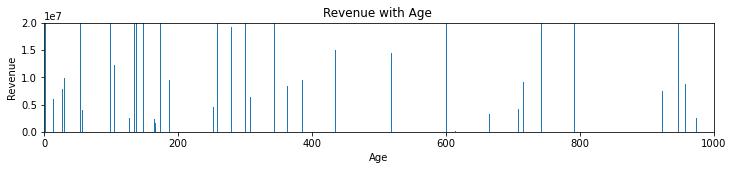

In [54]:
# Relstionship of Revenue with Age, for customers made by sales team, in the Assigned group



fig = plt.figure(figsize=(12 , 2))
Age = Data_clean[ Data_clean['SalesMadeCustomer'] > 0]['age']
revenue =Data_clean[ Data_clean['SalesMadeCustomer'] > 0]['revenue']
ax = plt.gca()
ax.set_xlim([0, 1000])
ax.set_ylim([0, 20000000])
plt.bar(Age, revenue)
plt.title('Revenue with Age ')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.show()
# Inference : No relation b/w age and revenue. if only assigned group , sales made customers considered

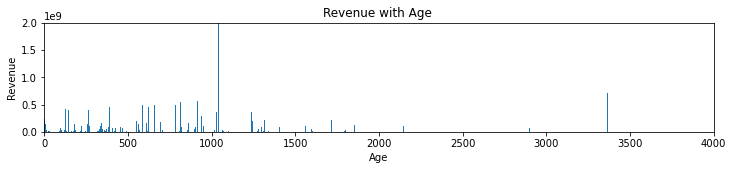

In [55]:
# Relstionship of Revenue with Age, for leads in the Assigned group



fig = plt.figure(figsize=(12 , 2))
Age = Data_clean[ Data_clean['assigned']==1]['age']
revenue =Data_clean[  Data_clean['assigned']==1]['revenue']
ax = plt.gca()
ax.set_xlim([0, 4000])
ax.set_ylim([0, 2000000000])
plt.bar(Age, revenue)
plt.title('Revenue with Age ')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.show()
# Inference : Maximun revenue is when age is near to 1000 days, and it gradually decreases then. for leads in the Assigned group

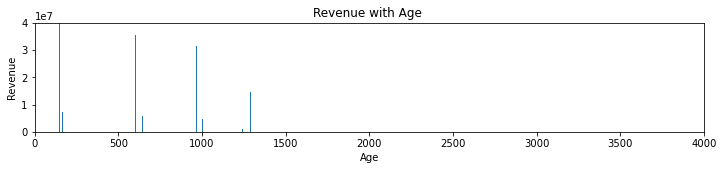

In [56]:
# Relstionship of Revenue with Age, for leads in the Unssigned group


fig = plt.figure(figsize=(12 , 2))
Age = Data_clean[ Data_clean['assigned']==0]['age']
revenue =Data_clean[  Data_clean['assigned']==0]['revenue']
ax = plt.gca()
ax.set_xlim([0, 4000])
ax.set_ylim([0, 40000000])
plt.bar(Age, revenue)
plt.title('Revenue with Age ')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.show()
# Inference :Revenue is decreasing with the age of the leads account. for leads in the unssigned group

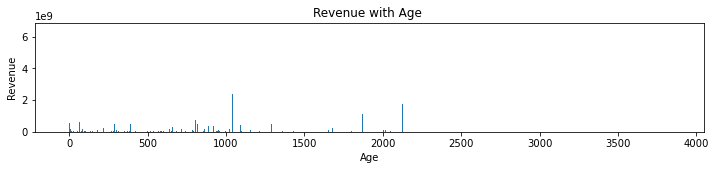

In [57]:
# Relationship of Revenue with Age, for all the leads together

fig = plt.figure(figsize=(12 , 2))
Age = Data_clean['age']
revenue =Data_clean['revenue']

plt.bar(Age, revenue)
plt.title('Revenue with Age ')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.show()
# Inference : No relation b/w age and revenue. for all the leads together


##### Question 2 / Question 5 More metric :  Analysis on Assigned Leads (37079 leads) , Relatiion between assign_days and revenue

In [58]:
Data_clean[Data_clean['assigned'] ==1 ][['assign_days' , 'revenue']].corr()
# From the leads that are assigned to sales, there is just 0.8% correlation between customer age (assign_days) and original revenue data 

,assign_days,revenue
assign_days,1.000000,0.008969
revenue,0.008969,1.000000


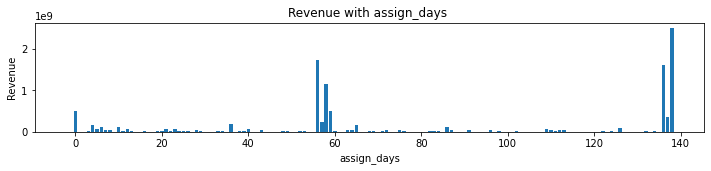

In [59]:
# Relationship of Revenue with assign_days, for all the assigned leads together

fig = plt.figure(figsize=(12 , 2))
assign_days = Data_clean[Data_clean['assigned']==1]['assign_days']
revenue =Data_clean[Data_clean['assigned']==1]['revenue']

plt.bar(assign_days, revenue)
plt.title('Revenue with assign_days ')
plt.xlabel('assign_days')
plt.ylabel('Revenue')
plt.show()
# Inference : Revenue increasing with assign days. for all the assigned leads together

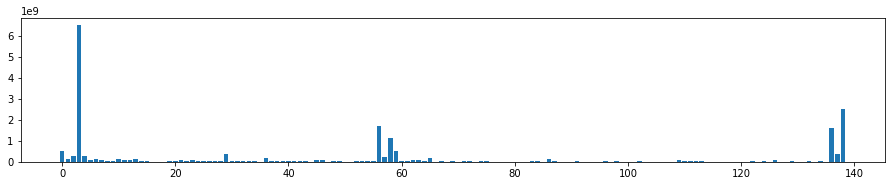

In [61]:
fig = plt.figure(figsize=(12 , 2))
ax = fig.add_axes([0,0,1,1])
scale_y = 1e3
SalesInvolvementAge = Data_clean[ Data_clean['revenue'] > 0]['assign_days']
revenue =Data_clean[ Data_clean['revenue'] > 0]['revenue']

ax.bar(SalesInvolvementAge,revenue)
plt.show()
# Relation between assign days and revenue, for the leads having revenue
# Closer to the sales assignment date, there is good revenue generation. More the number of assignment to sales, lesser the revenue

In [62]:
Data_clean['IsACustomer'] = np.where(Data_clean['revenue'] == 0, 0, 1)
#3340 are customers
#74551 are not customers

In [63]:
Data_clean.groupby(['IsACustomer']).count()

,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,ConversionDays,RevenueImputed,SalesMadeCustomer
IsACustomer,,,,,,,,,,,
0,74551,74551,74551,5093,74551,74551,74551,74551,74551,74551,74551
1,3340,3340,3340,3340,3340,3340,3340,3340,3340,3340,3340


In [64]:
Data_clean[Data_clean['revenue']==0].count()

assigned                  74551
date_assignment_starts    74551
date_assignment_ends      74551
first_revenue_date         5093
date_created              74551
age                       74551
assign_days               74551
revenue                   74551
ConversionDays            74551
RevenueImputed            74551
SalesMadeCustomer         74551
IsACustomer               74551
dtype: int64

In [65]:
Data_Customers = Data_clean[Data_clean['IsACustomer'] ==1]

In [66]:
Data_Customers.isna().count()

assigned                  3340
date_assignment_starts    3340
date_assignment_ends      3340
first_revenue_date        3340
date_created              3340
age                       3340
assign_days               3340
revenue                   3340
ConversionDays            3340
RevenueImputed            3340
SalesMadeCustomer         3340
IsACustomer               3340
dtype: int64

##### Question 3 - Another analysis - relationship between account age and revenue.  

In [67]:
# Lets see what is the revenue making customers' probability distribution by age

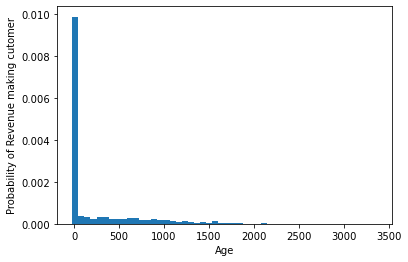

In [68]:

%matplotlib inline

np.random.seed(42)
x = np.array(Data_Customers['age']).reshape(-1,1)
plt.hist(x, density=True, bins=50)  # density=False would make counts
plt.ylabel('Probability of Revenue making cutomer')
plt.xlabel('Age');
# probability distribution for all age range is like below. right skewed. Maximum revenue making happened closer to creation date

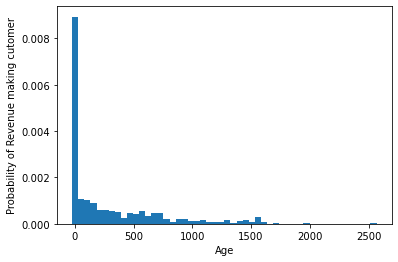

In [69]:



%matplotlib inline

np.random.seed(42)
x = np.array(Data_clean[Data_clean['SalesMadeCustomer']==1]['age']).reshape(-1,1)
plt.hist(x, density=True, bins=50)  # density=False would make counts
plt.ylabel('Probability of Revenue making cutomer')
plt.xlabel('Age');


##### Question 4 :]What is the incremental value of assigning a lead to the sales team?  

In [70]:
# We have already seen in Q1, that we get more revenue from Assigned group 
# We also have seen the rise in mean revenue from the assigned group, as compared to the unassigned group. in Q2
# Let us try if Linear regression can give a more explanatory relation between age and revenue, considering all leads together
X = np.array(Data_clean['assigned']).reshape(-1,1)
y = Data_clean['revenue']

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X, y)  # where X is your feature data and y is your target
model.coef_

array([2199845.33287297])

In [72]:
model.intercept_

1039001.1140106467

In [73]:
import statsmodels.api as sm
# fit the model and get a summary of the statistics
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              279.9
Date:                Mon, 18 Apr 2022   Prob (F-statistic):                    1.03e-62
Time:                        01:41:27   Log-Likelihood:                     -1.4685e+06
No. Observations:               77891   AIC:                                  2.937e+06
Df Residuals:                   77890   BIC:                                  2.937e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [74]:
# The high coefficient value (for assigned) from Linear models is proving the effect of sales assignment on Revenue.Because it is univariate analysis, and also there are only 2 values in assigned (0, 1), the coefficient is actually indicating the incremental effect of ‘assigned’ to the revenue. 

###### Question 5 : Linear Regression analysis to see effect of all the independent variables to the Revenue

In [75]:
modelAll = LinearRegression()


In [76]:
XAll = Data_clean[['assigned' , 'age' , 'assign_days' , 'ConversionDays']]

In [77]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(XAll, y, test_size = 0.2, random_state = 42)

In [78]:
modelAll.fit(x_train,y_train)

LinearRegression()

In [79]:
y_prediction =  modelAll.predict(x_test)
y_prediction

array([ 771428.87104005,  814254.07239983, 4881161.02883945, ...,
       2225535.5941702 ,  814254.07239983,  771428.87104005])

In [80]:
modelAll.coef_
# Inference : 
# 'assigned' has high affect on revenue , 'age' has high affect on revenue , 
# 'assign_days' has inverse effect i.e. if assign_days increase, revenue decrease, more number of days sales is assigned to leads, less is the revenue,
# 'ConversionDays' has slight effect. more is the numebr of conversion days, less is the revenue. 

array([ 1.10392293e+06,  8.88791350e+02, -2.14126007e+04, -9.59548509e+01])

In [81]:
modelAll.intercept_

3726367.764864769

In [82]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.0018529859269083016
mean_sqrd_error is== 1745058119792333.2
root_mean_squared error of is== 41773892.8015134


###### Question 5 : Time Series analysis was possible

In [83]:
# Maybe a better analysis would have been if there was time series data, with information on all the orders of the customer with time. 

###### Question 5 : A/B Testing analysis was possible

In [84]:
# Lets see if Randomized Control test possible ? (A/B Testing )
# A - Revenue with sales team assignment has increased
# B - Revenue with sales team assignment has not increased

In [85]:
# Treatment Group = AssignedDF
# Control Group = UnassignedDF
# Because the number of customers in each group (Unassigned and Assigned) is not equal, we cannot use totalrevenue as metric. (Unfair)
# Let the metric be - Revenue per customer - Normalization


# What will be the practical significance boundary (Increase in revenue to decide sales intervention affect)
# Assume - 2$ / user ? 

# Sample Size for the A/B Testing = (16* Variance of the population)/(Delta - differnece between treatment and control group)^2

# Rampup Plan : Day1,2,3,4 / Round1,2,3,4 - Take 5% , then 10%, 33%, 33%
# Confounding variables : Day of the week (Run experiment full week), seasonality(Run experiment full year), 


# Sanity checks - Number of users assigned to each group. 

# Now perform Hypothesis testing. and check Treatment1 vs Control, Treatment2 vs Control, Revenue increase, p-value, Confidence Interval
# Check if the results are statistically significant ? By looking at p value (p value < 0.05 - not statistically significant)
# Check if the results are practically significant ? By looking at the Point estimate. Is the point estimate > assumed practical siginificance boundary


###### Question 5 : Imputing revenue by ML

# Approach - Filling up revenue fields on basis of ML model - BAD APPROACH

In [101]:

# Causal Inference / Modelling = Using ML to impute the unassigned leads, some values, based on a ML model learnt from assigned group. 
# Calculating, ITE, ATE, CATE based on the ML model's output 

In [102]:
import sklearn as sk
from sklearn import linear_model


In [103]:
DF_Assigned.isna().count()

Unnamed: 0                37079
advertiser_id             37079
assigned                  37079
date_assignment_starts    37079
date_assignment_ends      37079
first_revenue_date        37079
date_created              37079
age                       37079
assign_days               37079
revenue                   37079
dtype: int64

In [104]:
DF_Assigned.revenue.fillna(0 , inplace = True)

C:\Users\lavin\AppData\Local\Temp\ipykernel_8252\4259441608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Assigned.revenue.fillna(0 , inplace = True)


In [105]:
DF_Assigned.revenue

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
           ...    
77886    9643000.0
77887          0.0
77888          0.0
77889          0.0
77890          0.0
Name: revenue, Length: 37079, dtype: float64

In [106]:
import numpy as np
Train_X = np.array(DF_Assigned['age']).reshape(-1,1)


In [107]:
#DF_Assigned['revenueDivideBy10000000000'] = DF_Assigned['revenue'].div(10000000000)

In [108]:
DF_Assigned['revenue']

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
           ...    
77886    9643000.0
77887          0.0
77888          0.0
77889          0.0
77890          0.0
Name: revenue, Length: 37079, dtype: float64

In [109]:
Train_Y = np.array(DF_Assigned['revenue'])


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [111]:
TrainX70, TestX30, TrainY70, TestY30 = train_test_split(Train_X, Train_Y, test_size=0.30, random_state=42)

In [112]:
# Plain Regression model on entire training data set

In [113]:
Regressor = sk.linear_model.LinearRegression()
Regressor.fit(TrainX70, TrainY70)

LinearRegression()

In [114]:
# Check Regression model's accuracy 

In [115]:
Test_Y30_Pred = Regressor.predict(TestX30)

In [116]:
PerformanceRegressor = mean_squared_error(TestY30, Test_Y30_Pred)

In [117]:
PerformanceRegressor # too high.. Means tooo bad regressor, means my approach is wrong, may be because there are so many 0 values in revenue. Its not a correct training data/approach

2807766673924946.0

In [118]:
# random search Ridge regression model 
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [119]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)


In [120]:
# execute search
result = search.fit(Train_X, Train_Y)

C:\Users\lavin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [121]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -5272221.750188783
Best Hyperparameters: {'alpha': 0.000135075129755462, 'fit_intercept': False, 'normalize': False, 'solver': 'sag'}
